# classification models to predict process failure

## Libraries used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing and storing datasets

In [2]:
data= pd.read_csv("./Data/Tabel1.csv")
data.head()

,TON,TOFF,SV,IP,WF,DE,NSR,ASR,SSR,OSR,SF,MO,RUL
0,105,30,30,40,3,1614,0.11,0.01,0.83,0.05,75000,WB,2.66
1,105,30,50,40,3,508,0.29,0.07,0.35,0.29,31000,NM,-
2,105,40,30,40,3,544,0.42,0.05,0.38,0.15,12000,NM,-
3,105,40,50,40,3,560,0.12,0.00,0.40,0.48,26000,NM,-
4,105,50,30,40,3,549,0.28,0.00,0.42,0.30,28500,NM,-


In [3]:
dataset = data.drop(["NSR", "ASR", "SSR", "OSR", "RUL"], axis=1)

In [4]:
train_data = dataset.copy(deep=True)

## Data Visualisation

In [5]:
train_data.head(5)

,TON,TOFF,SV,IP,WF,DE,SF,MO
0,105,30,30,40,3,1614,75000,WB
1,105,30,50,40,3,508,31000,NM
2,105,40,30,40,3,544,12000,NM
3,105,40,50,40,3,560,26000,NM
4,105,50,30,40,3,549,28500,NM


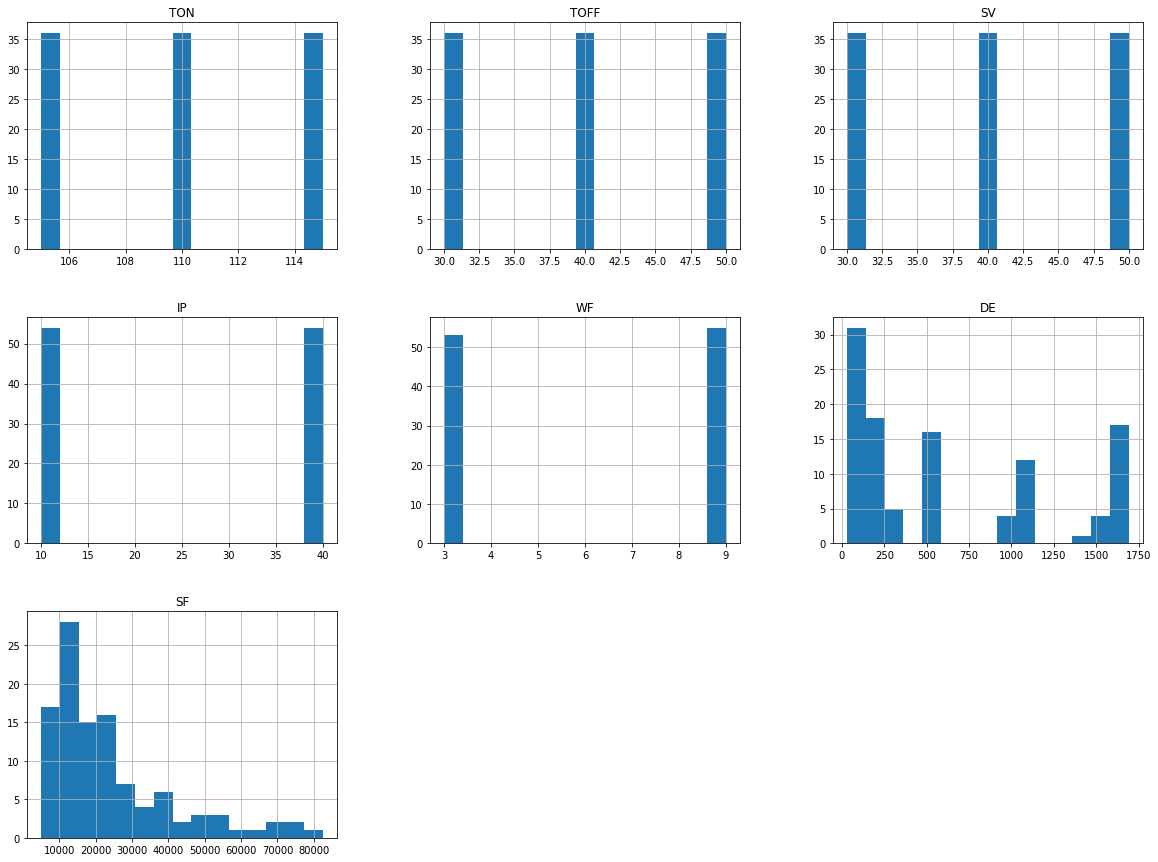

In [6]:
train_data.hist(bins=15, figsize=(20,15));

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TON     108 non-null    int64 
 1   TOFF    108 non-null    int64 
 2   SV      108 non-null    int64 
 3   IP      108 non-null    int64 
 4   WF      108 non-null    int64 
 5   DE      108 non-null    int64 
 6   SF      108 non-null    int64 
 7   MO      108 non-null    object
dtypes: int64(7), object(1)
memory usage: 6.9+ KB


In [8]:
train_data["MO"].value_counts()

NM    79
WB    16
SA    13
Name: MO, dtype: int64

In [9]:
train_set = train_data

In [10]:
X = train_set.drop("MO", axis=1)
y = train_set[["MO"]].copy(deep=True)

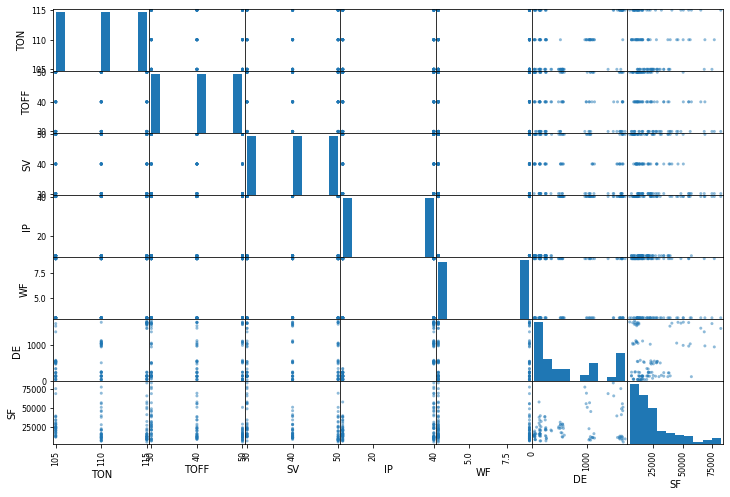

In [11]:
from pandas.plotting import scatter_matrix
attribs = ["TON","TOFF", "SV", "IP", "WF", "DE","SF","MO"]
scatter_matrix(train_data[attribs],figsize=(12,8));

## Data Trandformation Pipelines 

In [12]:
from Data_modification import Data_processing
X_prep, y_prep = Data_processing(X,y)

In [13]:
t = pd.DataFrame(np.concatenate((X_prep,y_prep), axis=1))
t.head()

,0,1,2,3,4,5,6,7
0,-1.224745,-1.224745,-1.224745,1.0,-1.018693,1.680192,2.961310,2.0
1,-1.224745,-1.224745,1.224745,1.0,-1.018693,-0.212163,0.415882,0.0
2,-1.224745,0.000000,-1.224745,1.0,-1.018693,-0.150567,-0.683280,0.0
3,-1.224745,0.000000,1.224745,1.0,-1.018693,-0.123191,0.126629,0.0
4,-1.224745,1.224745,-1.224745,1.0,-1.018693,-0.142012,0.271255,0.0


In [14]:
corr_matrix = t.corr()
corr_matrix[7].sort_values(ascending=False)

7    1.000000
6    0.702384
5    0.336327
3    0.239549
0    0.092648
4   -0.098778
2   -0.123531
1   -0.154414
Name: 7, dtype: float64

In [15]:
pd.DataFrame(X_prep.iloc[:,5:])

,5,6
0,1.680192,2.961310
1,-0.212163,0.415882
2,-0.150567,-0.683280
3,-0.123191,0.126629
4,-0.142012,0.271255
...,...,...
103,-0.639910,-0.804767
104,-1.030016,-0.602289
105,-0.672419,-0.156839
106,-1.024883,-0.547331


In [16]:
pd.DataFrame(y_prep)

,0
0,2.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
103,0.0
104,1.0
105,0.0
106,1.0


Text(0, 0.5, 'Failure Mode')

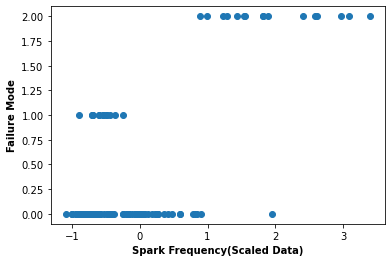

In [20]:
plt.scatter(X_prep[6], y_prep);
plt.xlabel("Spark Frequency(Scaled Data)", fontweight="bold")
plt.ylabel("Failure Mode", fontweight="bold")

Text(0, 0.5, 'Failure Mode')

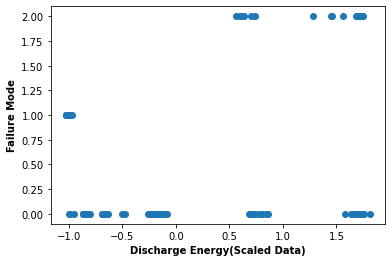

In [21]:
plt.scatter(X_prep[5], y_prep);
plt.xlabel("Discharge Energy(Scaled Data)", fontweight="bold")
plt.ylabel("Failure Mode", fontweight="bold")

C:\Users\abc\AppData\Local\Temp\ipykernel_16016\3460266485.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


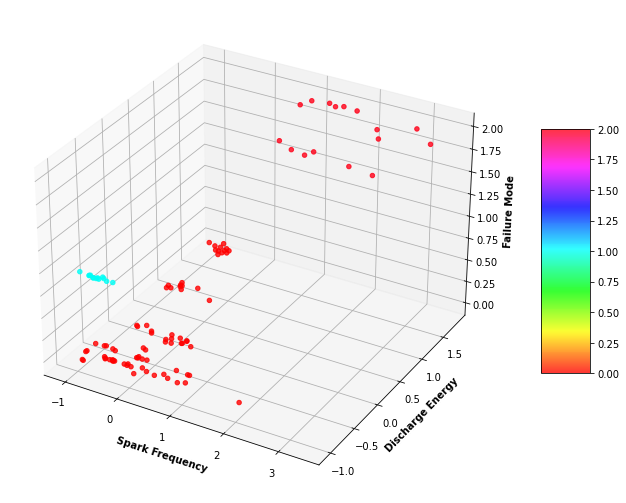

In [18]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',
        linestyle ='.', linewidth = 0.3,
        alpha = 0.2)
my_cmap = plt.get_cmap('hsv')
sctt = ax.scatter3D(X_prep[6],X_prep[5],y_prep,
                    alpha = 0.8,
                    c=(y_prep),
                    cmap = my_cmap,
                    marker ='o')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
ax.set_xlabel('Spark Frequency', fontweight ='bold')
ax.set_ylabel('Discharge Energy', fontweight ='bold')
ax.set_zlabel('Failure Mode', fontweight ='bold')
plt.show()

In [19]:
X_prep.iloc[:,5:]

,5,6
0,1.680192,2.961310
1,-0.212163,0.415882
2,-0.150567,-0.683280
3,-0.123191,0.126629
4,-0.142012,0.271255
...,...,...
103,-0.639910,-0.804767
104,-1.030016,-0.602289
105,-0.672419,-0.156839
106,-1.024883,-0.547331


In [20]:
X_arr = np.array(X_prep.iloc[:,5:])
y_arr = np.array(y_prep)

## Model Selection

- `Random forest Classifiers`

In [21]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators= 50,max_depth=7,criterion="gini")
rnd_clf.fit(X_arr,y_arr)

C:\Users\abc\AppData\Local\Temp\ipykernel_4860\2384753892.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(X_arr,y_arr)


RandomForestClassifier(max_depth=7, n_estimators=50)

## Performance testing

In [22]:
from Performance_check import Performance_testing
matrix_rnd,score_rnd = Performance_testing(rnd_clf,X_arr,y_arr)
print(matrix_rnd)
print(score_rnd)

c:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[[76  2  1]
 [ 3 10  0]
 [ 2  0 14]]
0.9250149342891278


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

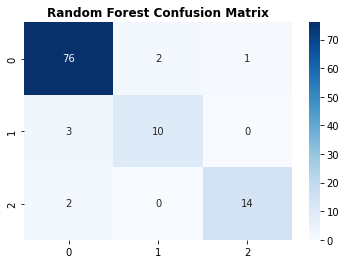

In [23]:
sns.heatmap(matrix_rnd, annot=True, cmap='Blues')
plt.title("Random Forest Confusion Matrix", fontweight="bold")

## Optimisation of the model

In [24]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    "bootstrap":[True],
    "n_estimators":[50,60,70,80,100,200,300],
    "max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    "max_features":["auto","sqrt"],
    "min_samples_leaf":[1, 2, 4],
    "min_samples_split":[2, 5, 10],
}
rnd_new = RandomForestClassifier()
rnd_search = RandomizedSearchCV(rnd_new, param_distributions=random_grid,cv=3,n_jobs=2,random_state=42)

In [25]:
rnd_search.fit(X_arr,y_arr)

c:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 60, 70, 80, 100,
                                                         200, 300]},
                   random_state=42)

In [26]:
rnd_search.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [27]:
rnd_search.best_estimator_

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=80)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "bootstrap": [True],

    "max_depth": [20,30,40,50,60],

    "min_samples_leaf": [1,2,3],

    "min_samples_split": [8, 10, 12],

    "n_estimators": [30,40,50,60,70]

}
grid_search = GridSearchCV(estimator=rnd_new,param_grid=param_grid,cv=3,n_jobs=2)

In [29]:
grid_search.fit(X_arr,y_arr)

c:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'bootstrap': [True], 'max_depth': [20, 30, 40, 50, 60],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [30, 40, 50, 60, 70]})

In [30]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 50}

In [31]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=12,
                       n_estimators=50)

In [32]:
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=10,n_estimators=30)


In [33]:
rf.fit(X_arr,y_arr)

C:\Users\abc\AppData\Local\Temp\ipykernel_4860\1542742079.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_arr,y_arr)


RandomForestClassifier(max_depth=20, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=30)

In [34]:
matrix_rf, score_rf = Performance_testing(rf,X_arr,y_arr)

c:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:1050: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Text(0.5, 1.0, 'Random Forest Confusion Matrix Optimised')

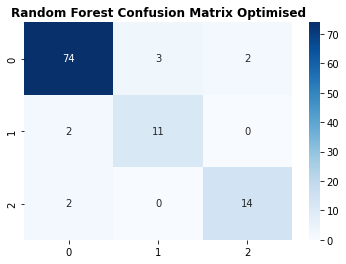

In [35]:
sns.heatmap(matrix_rf, annot=True, cmap='Blues')
plt.title("Random Forest Confusion Matrix Optimised", fontweight="bold")

In [36]:
score_rf

0.9172586127056521

## Model Testing

In [37]:
test_data = pd.read_csv("./Data/Test_set.csv")
test_data.drop(["SSR", "OSR", "RUL"], axis=1,inplace=True)

In [38]:
X_test = test_data.drop("MO", axis=1)
y_test = test_data[["MO"]].copy(deep=True)

In [39]:
from Data_modification import Data_processing
X_test_prep, y_test_prep = Data_processing(X_test,y_test)

In [40]:
X_test_arr = np.array(X_test_prep.iloc[:,5:])
y_test_arr = np.array(y_test_prep)

In [41]:
y_test_pred = rf.predict(X_test_arr)

In [42]:
y_test_pred

array([2., 2., 0., 2., 1., 1., 0., 0., 0., 0., 1., 1.])

In [43]:
y_test_arr

array([[2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [44]:
from sklearn.metrics import confusion_matrix, f1_score
test_matrix = confusion_matrix(y_test_arr,y_test_pred)
test_score = f1_score(y_test_arr,y_test_pred, average="weighted")

Text(0.5, 1.0, 'Random Forest Confusion Matrix Optimised(test)')

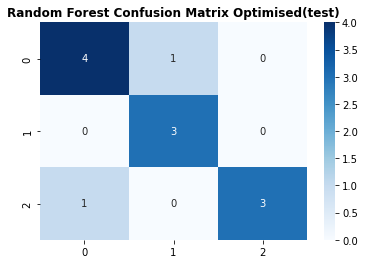

In [45]:
sns.heatmap(test_matrix, annot=True, cmap='Blues')
plt.title("Random Forest Confusion Matrix Optimised(test)", fontweight="bold")

In [46]:
test_score

0.8333333333333334